In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
census = pd.read_csv('datasets/census/census.csv')
census.head()

,state,year,population,land_area
0,Alabama,2010,4785437,52420
1,Alabama,2011,4799069,52420
2,Alabama,2012,4815588,52420
3,Alabama,2013,4830081,52420
4,Alabama,2014,4841799,52420


In [3]:
divisions = pd.read_csv('datasets/census/census-divisions.csv')
divisions.head()

,state,postal_code,region,division
0,Connecticut,CT,Northeast,New England
1,Maine,ME,Northeast,New England
2,Massachusetts,MA,Northeast,New England
3,New Hampshire,NH,Northeast,New England
4,Rhode Island,RI,Northeast,New England


1. Sort the data by _region_ ascending, _division_ ascending and _population_ descending. (You will need to combine datasets to do this.) Write the results to an Excel worksheet. 

In [12]:
census = census.merge(divisions, how='left')
census.head()

,state,year,population,land_area,postal_code,region,division
0,Alabama,2010,4785437,52420,AL,South,East South Central
1,Alabama,2011,4799069,52420,AL,South,East South Central
2,Alabama,2012,4815588,52420,AL,South,East South Central
3,Alabama,2013,4830081,52420,AL,South,East South Central
4,Alabama,2014,4841799,52420,AL,South,East South Central


In [14]:
census_sorted = census.sort_values(by=['region','division','population'], ascending=[True,True,False])
census_sorted.head()

census_sorted.to_excel('datasets/census/solutions-data/census-sorted.xlsx')

Drop the _postal_code_ field from your merged dataset. 

In [15]:
census = census.drop('postal_code', axis=1)
census.head()

,state,year,population,land_area,region,division
0,Alabama,2010,4785437,52420,South,East South Central
1,Alabama,2011,4799069,52420,South,East South Central
2,Alabama,2012,4815588,52420,South,East South Central
3,Alabama,2013,4830081,52420,South,East South Central
4,Alabama,2014,4841799,52420,South,East South Central


Create a new column _density_ which is a calculation of population divided by land area. 

In [16]:
census['density'] = census['population']/census['land_area']
census.head()

,state,year,population,land_area,region,division,density
0,Alabama,2010,4785437,52420,South,East South Central,91.290290
1,Alabama,2011,4799069,52420,South,East South Central,91.550343
2,Alabama,2012,4815588,52420,South,East South Central,91.865471
3,Alabama,2013,4830081,52420,South,East South Central,92.141950
4,Alabama,2014,4841799,52420,South,East South Central,92.365490


Visualize the relationship between land area and population for all observations in 2015. 



In [18]:
census_2015 = census[census['year']==2015]
census_2015.head()

,state,year,population,land_area,region,division,density
5,Alabama,2015,4852347,52420,South,East South Central,92.566711
11,Alaska,2015,737498,665384,West,Pacific,1.108380
17,Arizona,2015,6829676,113990,West,Mountain,59.914694
23,Arkansas,2015,2978048,53179,South,West South Central,56.000451
29,California,2015,38918045,163695,West,Pacific,237.747304


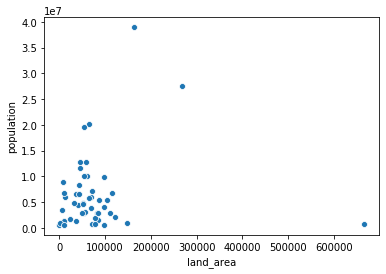

In [19]:
sns.scatterplot(x='land_area', y='population', data=census_2015)

In [22]:
# Let's sort our data by land area to see the extreme values...

census_2015.sort_values(by='land_area', ascending=False).head()

,state,year,population,land_area,region,division,density
11,Alaska,2015,737498,665384,West,Pacific,1.108380
263,Texas,2015,27470056,268596,South,West South Central,102.272767
29,California,2015,38918045,163695,West,Pacific,237.747304
161,Montana,2015,1030475,147040,West,Mountain,7.008127
191,New Mexico,2015,2089291,121590,West,Mountain,17.183082


Find the total population for each region in 2015.  

In [29]:
census_2015[['region','population']].groupby('region').sum()

,population
region,
Midwest,67860583
Northeast,56034684
South,120997341
West,75742555
